# Finding Roots

#### Find the solutions of f (x) = 0, where the function f is given.

In basic algebra, we learned to solve for the roots of the quadratic equation.

$$f(x)=ax^2+bx+c=0$$

It is also known as finding the "zeros" of the equation, or where the equation crosses the x-axis i.e. $f(x)=0$. The quadradic formula is as follows:

$$x = \frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

This is easy to solve by hand. However, what happens when when the equations become much more complicated like higher order algebraic equations or transcendental equations. Then numerical solutions are the only way.

## Simple solution
Lets solve the simple quadratic by letting $a=2$, $b=-11$, and $c=5$.

$$f(x)=2x^2-11+5=0$$

We can manually solve this using the quadratic solution above.

$$x = \frac{-11\pm\sqrt{-11^2-2*5}}{2*2}=1/2\space and \space 5$$

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
a,b,c,x = sp.symbols('a b c x')
expr = a*x**2+b*x+c
expr

a*x**2 + b*x + c

In [5]:
x1, x2 = sp.solve(expr,x)

In [6]:
x1

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [7]:
x2

-(b + sqrt(-4*a*c + b**2))/(2*a)

In [8]:
ac = 2
bc = -11
cc = 5
f_x = expr.subs([(a,ac),(b,bc),(c,cc)])
f_x

2*x**2 - 11*x + 5

## Plot to find potential zero ranges (bracketing methods)

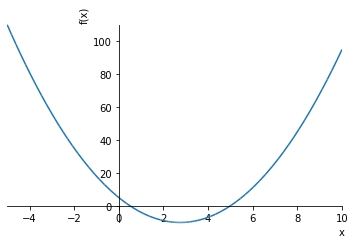

In [9]:
sp.plot(f_x,(x,-5,10))

In [10]:
x1.subs([(a,ac),(b,bc),(c,cc)])

5

In [11]:
x2.subs(([(a,ac),(b,bc),(c,cc)]))

1/2

## Numerical methods

### Definition of function

In [12]:
def f(x): return 2*x**2-11*x+5

### Implementation of bracketing method from book

In [13]:
import sys
def err(string):
    print(string)
    input('Press return to exit') 
    sys.exit()

    
import math
from numpy import sign

def bisection(f,x1,x2,switch=1,tol=1.0e-9): 
    f1 = f(x1)
    if f1 == 0.0: return x1 
    f2 = f(x2)
    if f2 == 0.0: return x2 
    if sign(f1) == sign(f2):
        print("Root is not bracketed")
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))

    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
        and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0: return x3
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3 
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0

### Run method on function

In [14]:
bisection(f,2,10,switch=1,tol=1.0e-9)

5.0

### Use high grade method from scipy

In [15]:
from scipy.optimize import bisect
x = bisect(f, 2, 7, xtol=1e-6)
x

5.0000001192092896

### Solving for other functions

In [16]:
def f(x): return x**3-10.0*x**2+5.0

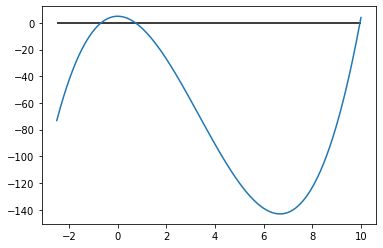

In [17]:
x = np.arange(-2.5,10,0.01)
plt.plot(x,f(x))
plt.hlines(0,-2.5,10)

In [18]:
from scipy.optimize import fsolve
x = fsolve(f, 6) 
x

array([9.94949106])

## Real Problems

### Example of spherical tank (using Newton Raphson)

A spherical tank of radius $5ft$ is constructed and the level of water in it, or height $h$ needs to be measured when the tank reaches $20ft^3$ of volume. The equation for the volume of liquid is as follows:

$$V = \pi h^2 \frac{[3r-h]}{3}$$

where $V$ is volume, $h$ is level height of fluid, and $r$ is the radius of the tank.

Lets use the Newton Raphson open method to solve.

$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$$

NR Error calculation

$$E_a=\left| \frac{(x_{i+1}-x_i)}{x_{i+1}} \right| \times100$$

### Code

In [19]:
v = 20 #tank volume [ft^3]
r = 5 #tank radius [ft]

def tank(h): return np.pi * h**2 *(3*r-h)/3  - v

def d_tank(h): #Derivative of tank function
    return np.pi * (2*h*r-h**2)

### Plotting

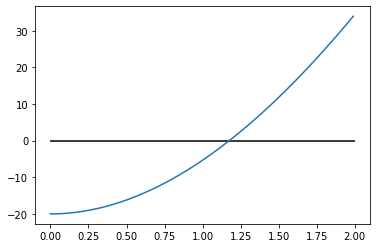

In [20]:
x = np.arange(0,2,0.01)
y = tank(x)
plt.hlines(0,0,2)
plt.plot(x,y)
#plt.plot(level,0,'x')

### Loop

In [21]:
xi = input("please give an inital fluid height guess. Note: it can't be greater than tank radius:" ) 

Ea = 100
xi = 2  
n = 0

# this while loop will run while the relative approximate error is greater than 1%.
while Ea > 1:
    xnew = xi - tank(xi)/d_tank(xi)
    Ea = abs((xnew-xi)/xnew)* 100
    n +=1
    print ("iteration: " +str(n) + " Xnew: " + str(xnew) + " Error: " + str(Ea) +" %")
    xi = xnew

please give an inital fluid height guess. Note: it can't be greater than tank radius:
iteration: 1 Xnew: 1.3145540243964051 Error: 52.14285323254983 %
iteration: 2 Xnew: 1.1817001366484903 Error: 11.242605770082406 %
iteration: 3 Xnew: 1.1753828024658846 Error: 0.5374703602394315 %


### Comparison with bisection method from earlier

In [22]:
level = bisection(tank,0,2,switch=1,tol=1.0e-9)
level

1.1753681027330458

### 1 - Vogel's inflow performance relationship
Vogel was the first to present an easy-to-use method for predicting the performance of oil wells. His empirical inflow performance relationship (IPR) is based on computer simulation results and is given by

$$\frac{q_o}{q_{o,max}}=1-0.2\left(\frac{p_{wf}}{\bar p_R}\right)-0.8\left(\frac{p_{wf}}{\bar p_R}\right)^2$$

$q_o$ is the oil flow rate in _STB/D_

$q_{o,max}$ is the maximum oil flow rate in _STB/D_

$p_{wf}$ is bottomhole pressure in _psia_

$\bar p_R$ is average reservoir pressure in _psia_



### Application of Vogel's (using scipy methods)
A well is producing from a reservoir having an average reservoir pressure of 2,300 _psig_. A stabilized production test on the well resulted in a producing rate of 385 _STB/day_ when the flowing bottom hole pressure was 1,631 _psig_.

#### First find the maximum production rate $q_{o,max}$. 

In [23]:
Pr = 2300
q = 385
Pwf = 1631
qmax = (q/(1-(0.2*(Pwf/Pr))-(0.8*(Pwf/Pr)**2)))
qmax

844.5183867117553

#### Now use root finding to find a specific producing bottom hole pressure
If we desire an inflow rate of 650 _STB/D_ what is the required bottom hole pressure.

In [24]:
def pwf (qmax): retirm -pr8 (q,ax)

### Define function

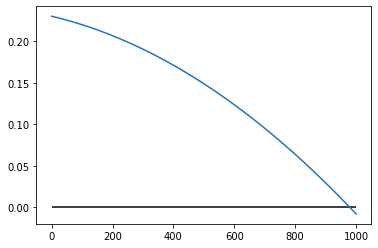

In [25]:
def f(x): return (1.-0.2*(x/2300.)-0.8*(x/2300)**2)-(650/844.5)
x = np.arange(0,1000,0.01)
plt.plot(x,f(x))
plt.hlines(0,0,1000)

### Solve

#### Bracketed Method (scipy.bisect)

In [27]:
from scipy.optimize import bisect
x = bisect(f,800,1000,xtol=1e-6)
x

979.625179618597

#### Open method (scipy.optimize.fsolve)

In [28]:
import scipy
x = scipy.optimize.fsolve(f, 800.)
x

array([979.62517945])

### 2 - Pipe Friction (using scipy methods)

The Colebrook equation is a very common way to calculate friction factor (a dimensionless number that characterizes the pipe's resistance to flow) for pipe flow when the flow is turbulent i.e. $Re>4000$.

$$0 = \frac{1}{\sqrt{f}}+2.0log\left (\frac{\epsilon}{3.7D}+\frac{2.51}{Re\sqrt{f}} \right) $$

where $\epsilon$ = the roughness in _m_, $D$ = diameter in _m_, and $Re$ = the _Reynolds number_

$$Re=\frac{\rho V D}{\mu}$$

where $\rho$ = the fluid's density in $kg/m^3$, $V$ is the fluid velocity in _m/s_, and $\mu$ = dynamic viscosity in $N \cdot s/m^2$

#### Solve for the friction factor for a specific pipe flow 

Assume for the case of $\rho=1.23kg/m^3$, $\mu=1.79\times10^{-5}N\cdot s/m^2$, $D=0.005m$, $V=40m/s$, and $\epsilon=0.0015mm$.

#### First calculate Reynolds Number

In [31]:
p = 1.23
u = 1.79*10**-5
d = .005
v = 40
e = 0.0015
Re = (p*v*d)/(u)
Re

13743.016759776536

### Define function

In [34]:
def f(x): return 1./np.sqrt(x)+2.0*np.log10((e/3.7*d)+)(2.51/(Re*np.sqrt(x)))
f(.2)

SyntaxError: invalid syntax (<ipython-input-34-5588d8975e07>, line 1)

### Plot to see where root value may lie

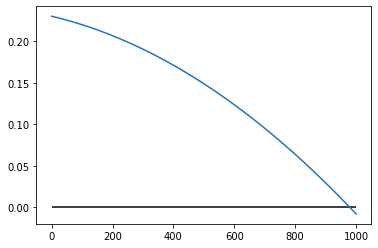

In [35]:
x =np.arange (0,1000,0.01)
plt.plot(x,f(x))
plt.hlines(0,0,1000)

#### Bracketed Method

In [36]:
from scipy.optimize import bisect
x = bisect(f,0,.1000,xtol = 1.0e-6)
x

ValueError: f(a) and f(b) must have different signs

#### Open method

In [37]:
import scipy
x = scipy.optimize.fsolve(f,.01)
x

array([979.62517945])